# Adversarial Agent 
- I experimented with  
    - Iterative deepening.
    - Alphabeta algorithm.
    - Heuristic: rewarding more to - 
        - restrict apponents future liberties.
        - stay closer to the center of the board. 




## Winning-rate comparison: base and custom algorithm


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ['PATH']

'/home/lab/anaconda3/envs/aind/bin:/home/lab/anaconda3/envs/aind/bin:/home/lab/anaconda3/envs/u1/bin:/home/lab/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin'

In [2]:
cols = ['algorithm', 'opponent' ]
df = pd.read_table("./reportsfull/game_result.csv", sep="," )
df['name'] = df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)  
df


,algorithm,opponent,rounds,time,percentageWin,name
0,custom,RANDOM,100,75,96.0,custom_RANDOM
1,custom,GREEDY,100,75,99.0,custom_GREEDY
2,custom,MINIMAX,100,75,85.5,custom_MINIMAX
3,custom,SELF,100,75,49.5,custom_SELF
4,custom,RANDOM,100,150,97.0,custom_RANDOM
5,custom,GREEDY,100,150,99.5,custom_GREEDY
6,custom,MINIMAX,100,150,80.0,custom_MINIMAX
7,custom,SELF,100,150,50.0,custom_SELF
8,custom,RANDOM,100,750,96.5,custom_RANDOM
9,custom,GREEDY,100,750,100.0,custom_GREEDY


In [3]:
df.cc = pd.Categorical(df.opponent)
df['opponent_code'] = df.cc.codes
df.cc.categories 

/home/lab/anaconda3/envs/aind/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


Index(['GREEDY', 'MINIMAX', 'RANDOM', 'SELF'], dtype='object')

Win-rate comparison: base and custom algorithm

In [4]:
cols = ['algorithm', 'opponent' ]
df.pivot(index="name", columns="time", values="percentageWin")



time,75,150,750
name,,,
base_GREEDY,33.0,35.0,50.0
base_MINIMAX,47.0,48.5,50.0
base_RANDOM,94.5,92.5,93.0
base_SELF,48.0,54.0,50.0
custom_GREEDY,99.0,99.5,100.0
custom_MINIMAX,85.5,80.0,81.5
custom_RANDOM,96.0,97.0,96.5
custom_SELF,49.5,50.0,50.0


Win-rate comparison: base and custom algorithm

[Text(0,0,'RANDOM'), Text(0,0,'GREEDY'), Text(0,0,'MINIMAX'), Text(0,0,'SELF')]

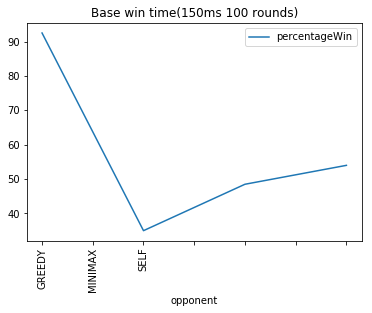

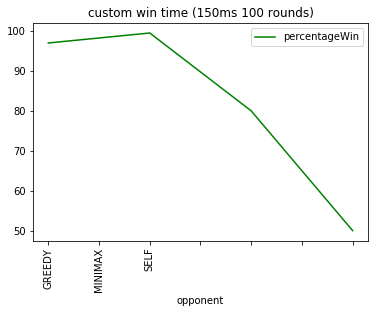

In [5]:
df_g = df[(df.algorithm  ==  "base") & (df.time  == 150 )]
ax =df_g.plot.line(y='percentageWin', x='opponent', title="Base win time(150ms 100 rounds)")  
ax.set_xticklabels(df_g.opponent, rotation=90) 

df_g2 = df[(df.algorithm  ==  "custom") & (df.time  == 150 )]
ax =df_g2.plot.line(y='percentageWin', x='opponent', title="custom win time (150ms 100 rounds)" , color="green")  
ax.set_xticklabels(df_g2.opponent, rotation=90)


Win-rate comparison: base and custom algorithm

In [6]:
df.loc[df.opponent == "GREEDY",["time", "name", "percentageWin"]].sort_values(by="time")

,time,name,percentageWin
1,75,custom_GREEDY,99.0
21,75,base_GREEDY,33.0
5,150,custom_GREEDY,99.5
13,150,base_GREEDY,35.0
9,750,custom_GREEDY,100.0
17,750,base_GREEDY,50.0


Win-rate comparison:   GREEDY + percentageWin + time

In [7]:
df.loc[df.opponent == "MINIMAX",["time", "name", "percentageWin"]].sort_values(by="time")

,time,name,percentageWin
2,75,custom_MINIMAX,85.5
22,75,base_MINIMAX,47.0
6,150,custom_MINIMAX,80.0
14,150,base_MINIMAX,48.5
10,750,custom_MINIMAX,81.5
18,750,base_MINIMAX,50.0


Win-rate comparison:   MINIMAX + percentageWin + time

In [8]:
df.loc[df.opponent == "RANDOM",["time", "name", "percentageWin"]].sort_values(by="time")

,time,name,percentageWin
0,75,custom_RANDOM,96.0
20,75,base_RANDOM,94.5
4,150,custom_RANDOM,97.0
12,150,base_RANDOM,92.5
8,750,custom_RANDOM,96.5
16,750,base_RANDOM,93.0


Win-rate comparison:   RANDOM + percentageWin + time

In [9]:
df.loc[df.opponent == "SELF",["time", "name", "percentageWin"]].sort_values(by="time")

,time,name,percentageWin
3,75,custom_SELF,49.5
23,75,base_SELF,48.0
7,150,custom_SELF,50.0
15,150,base_SELF,54.0
11,750,custom_SELF,50.0
19,750,base_SELF,50.0


Win-rate comparison:   SELF + percentageWin + time

In [10]:
df_g = df[(df.algorithm  ==  "custom") & (df.time  == 75 )]
df_g


,algorithm,opponent,rounds,time,percentageWin,name,opponent_code
0,custom,RANDOM,100,75,96.0,custom_RANDOM,2
1,custom,GREEDY,100,75,99.0,custom_GREEDY,0
2,custom,MINIMAX,100,75,85.5,custom_MINIMAX,1
3,custom,SELF,100,75,49.5,custom_SELF,3


Win-rate comparison:   custom + time = 75ms

In [11]:
df_g = df[(df.algorithm  ==  "custom") & (df.time  == 150 )]
df_g


,algorithm,opponent,rounds,time,percentageWin,name,opponent_code
4,custom,RANDOM,100,150,97.0,custom_RANDOM,2
5,custom,GREEDY,100,150,99.5,custom_GREEDY,0
6,custom,MINIMAX,100,150,80.0,custom_MINIMAX,1
7,custom,SELF,100,150,50.0,custom_SELF,3


Win-rate comparison:   custom + time = 150ms

In [12]:
df_g = df[(df.algorithm  ==  "custom") & (df.time  == 750 )]
df_g


,algorithm,opponent,rounds,time,percentageWin,name,opponent_code
8,custom,RANDOM,100,750,96.5,custom_RANDOM,2
9,custom,GREEDY,100,750,100.0,custom_GREEDY,0
10,custom,MINIMAX,100,750,81.5,custom_MINIMAX,1
11,custom,SELF,100,750,50.0,custom_SELF,3


Win-rate comparison:   custom + time = 750ms

## Search: as depth increases the wining rate also increases up to certain depth 

In [13]:

df = pd.read_table("./reportsD/depth_game_result.csv", sep="," )
df 


,algorithm,apponent,rounds,time,depth,percentageWin
0,custom,MINIMAX,10,150,3,30.0
1,custom,GREEDY,10,150,3,50.0
2,custom,RANDOM,10,150,3,90.0
3,custom,MINIMAX,10,150,6,70.0
4,custom,GREEDY,10,150,6,100.0
5,custom,RANDOM,10,150,6,100.0
6,custom,MINIMAX,10,150,9,80.0
7,custom,GREEDY,10,150,9,100.0
8,custom,RANDOM,10,150,9,100.0
9,custom,MINIMAX,10,150,12,75.0


Win-rate comparison:   apponent + depth = [93,6,9,12,15]

In [14]:
df_g = df[(df.apponent  ==  "MINIMAX")]
df_g2= df_g[["apponent","depth","percentageWin"]]
df_g2

,apponent,depth,percentageWin
0,MINIMAX,3,30.0
3,MINIMAX,6,70.0
6,MINIMAX,9,80.0
9,MINIMAX,12,75.0
12,MINIMAX,15,90.0


Data for depth from 3 to 15

### What features of the game does your heuristic incorporate, and why do you think those features matter in evaluating states during search?

#### Answer:
- I did use  alpha-beta algorithm with iterative deepening.
      - Heuristic is based upon
        - Rewarding more if the moves results in :  
            - 1: reducing opponents future possible moves. 
            - 2: getting closer to the center of the board. 
            - 3: consider the shared future moves (not used this in above tests) 
- The results compared to the base heuristic seems to be improved.
- However, I think heuristic (1,2) could be weighted correctly to get better results. Specifically the min-max agent could still find better moves - in spite of increased time, depth.


### Analyze the search depth your agent achieves using your custom heuristic. Does search speed matter more or less than accuracy to the performance of your heuristic?

#### Answer:
- The results above for depth testing: clearly shows depth has effect until some threshold.
- After that the better heuristic should be used for better results.
- Unlike greedy search, using depth the algorithm can see the wrong moves before hand.
- Increased time factor : does not have much effect after some threshold. 
- Sure increased time and depth factors: has negative effect on the performance.
- The effect of time and depth on performance will become more severe when the complexity of problem increases. Only good heuristic could help in that case.

